<a href="https://colab.research.google.com/github/bobbercheng/ventilator-pressure-prediction/blob/master/ventilator_gb_rescaling_V14_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

V1: Keep R/C, improve

V2: Add R**2, no improve

V3: Update model from https://www.kaggle.com/dlaststark/gb-vpp-pulp-fiction. Not much improve compare V1

V4: Use whole db for test Fold-1
Fold-1 | OOF Score: 0.15912771348961205

Run it again in Kaggle:

Fold-1 | OOF Score: 0.1606402072946816

V5: Add loading ScaleLayer from saved model

V6: Add TransformerEncoder. TransformerEncoder(128, 512, 8, name="transformer_layer")(x). Testing in GPU.

V7: Try to scale targe to 0-1, but it slow the train as MASE cannot be scaled.

V8: Removed target scale.
Epoch 00022: val_loss improved from 0.32912 to 0.30967, saving model to ./model-gpu/Bidirect_LSTM_model_1C.h5
Epoch 23/150
127/127 [==============================] - 161s 1s/step - loss: 0.3176 - val_loss: 0.2917

Not Good as without TransformerEncoder. Change paramemter back to 

V8: Change attention result to multiple instead of concate.

Loss is smaller than without LayerNormalization, but CV is bigger. It means it overfit the train data.

TransformerEncoder(128, 512, 8, 0.3, name="transformer_layer")

Epoch 00181: val_loss did not improve from 0.16212
Epoch 182/200
127/127 [==============================] - 163s 1s/step - loss: 0.0448 - val_loss: 0.1655

Epoch 00182: ReduceLROnPlateau reducing learning rate to 5.6313510867767036e-05.

Epoch 00182: val_loss did not improve from 0.16212
Restoring model weights from the end of the best epoch.
Epoch 00182: early stopping
Fold-1 | OOF Score: 0.16211654680482343

V9: Increase attention dropout to 0.6, add 0.01 droupout to input
Epoch 00123: ReduceLROnPlateau reducing learning rate to 0.00031640623637940735.

Epoch 00123: val_loss did not improve from 0.16714
Epoch 124/200
127/127 - 161s - loss: 0.0838 - val_loss: 0.1694

Epoch 00124: val_loss did not improve from 0.16714
Epoch 125/200
127/127 - 161s - loss: 0.0796 - val_loss: 0.1727

V10: add TransformerEncoder to all layer with Multiply

Epoch 164/200
253/253 - 387s - loss: 0.0568 - val_loss: 0.1679

Epoch 00164: val_loss did not improve from 0.16158
Restoring model weights from the end of the best epoch.
Epoch 00164: early stopping
Fold-1 | OOF Score: 0.16158229343436334

V10: analy_predict.

Here is analyze result for V4:
20__10 - MAE  0.16386306650915122, count: 25870
20__20 - MAE  0.15764106283234391, count: 26272
20__50 - MAE  0.16384391190488698, count: 34729
50__10 - MAE  0.1585241009544335, count: 60574
50__20 - MAE  0.24078390163257296, count: 37108
50__50 - MAE  0.23760641023725088, count: 34699
5__10 - MAE  0.15540978004136713, count: 36361
5__20 - MAE  0.10102388763185534, count: 35935
5__50 - MAE  0.11535413256937187, count: 35522


V11: add dnn_model_GaussianNoise(), no improve

Epoch 00183: val_loss did not improve from 0.16240
Epoch 184/200
127/127 - 150s - loss: 0.0498 - val_loss: 0.1642

Epoch 00184: ReduceLROnPlateau reducing learning rate to 7.508467933803331e-05.

Epoch 00184: val_loss did not improve from 0.16240
Restoring model weights from the end of the best epoch.
Epoch 00184: early stopping
Fold-1 | OOF Score: 0.16240143234043636

V12: dnn_model_aen(), use auto encoder to remove noise and learn encode.

Epoch 200/200
127/127 - 153s - loss: 4.1734 - decoder_loss: 3.8822 - ae_action_loss: 0.2257 - output_loss: 0.0654 - val_loss: 0.7126 - val_decoder_loss: 0.3742 - val_ae_action_loss: 0.1702 - val_output_loss: 0.1682

Epoch 00200: val_loss did not improve from 0.69120

Fold-1 | OOF Score: 0.16817480317739367
20__10 - MAE  0.16644539428012722, count: 25870
20__20 - MAE  0.15768315124243204, count: 26272
20__50 - MAE  0.16684243562006307, count: 34729
50__10 - MAE  0.16641273893399433, count: 60574
50__20 - MAE  0.2518146440943941, count: 37108
50__50 - MAE  0.2752187431993935, count: 34699
5__10 - MAE  0.16763255549569941, count: 36361
5__20 - MAE  0.10697168010290617, count: 35935
5__50 - MAE  0.11503387157283243, count: 35522

decoder_loss is very large. It means GaussianNoise() and dropout causes side effect.

V13. Remove GaussianNoise and dropout, use encoder feature only. CV score is a little worse.

Epoch 200/200
127/127 - 150s - loss: 0.5841 - decoder_loss: 0.3983 - ae_action_loss: 0.1025 - output_loss: 0.0832 - val_loss: 0.4930 - val_decoder_loss: 0.1541 - val_ae_action_loss: 0.1693 - val_output_loss: 0.1696

Epoch 00200: val_output_loss did not improve from 0.16793
Fold-1 | OOF Score: 0.16959694784227083
20__10 - MAE  0.18958046275757853, count: 25870
20__20 - MAE  0.16960937531364753, count: 26272
20__50 - MAE  0.1714088869810135, count: 34729
50__10 - MAE  0.17159657573233353, count: 60574
50__20 - MAE  0.2590598477978727, count: 37108
50__50 - MAE  0.26932839218852966, count: 34699
5__10 - MAE  0.16335297055531042, count: 36361
5__20 - MAE  0.11217990298083265, count: 35935
5__50 - MAE  0.12327488392594069, count: 35522


In [35]:
# Update pandas version for Colab TPU
!pip install pandas==1.3.2

## Import libraries

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

LOAD_PRE_FEATURE = True

In [ ]:
if IN_COLAB:
  from google.colab import drive
  drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
if IN_COLAB:
  !pip install kaggle
  !mkdir /root/.kaggle
  !cp /gdrive/MyDrive/ventilator-pressure-prediction/kaggle.json /root/.kaggle
  !kaggle competitions download -c ventilator-pressure-prediction
  !kaggle datasets download -d  ventilatorpressurepredictionfeatures
  !mkdir -p ../input/ventilator-pressure-prediction
  !unzip '*.zip' -d ../input/ventilator-pressure-prediction
  !ls ../input/ventilator-pressure-prediction
  !mkdir /gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-wavenet
  #Map Google driver folder to local folder model to save model
  !ln -s /gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-wavenet model-gpu
else:
  !mkdir ./model-gpu

mkdir: cannot create directory ‘/root/.kaggle’: File exists
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
ventilatorpressurepredictionfeatures.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ventilatorpressurepredictionfeatures.zip
replace ../input/ventilator-pressure-prediction/test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Archive:  test.csv.zip

Archive:  train.csv.zip

Archive:  sample_submission.csv.zip

4 archives were successfully processed.
sample_submission.csv  test.csv  test.npy  train.csv  train.npy
mkdir: cannot create directory ‘/gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-wavenet’: File exists


In [ ]:
import gc
import numpy as np
import pandas as pd
import random
import os
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply



# Random Seed Initialize
RANDOM_SEED = 42

def seed_everything(seed=RANDOM_SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    
seed_everything()

## Load datasets

In [ ]:
train_df = pd.read_csv('../input/ventilator-pressure-prediction/train.csv')
print(f"train_df: {train_df.shape}")
train_df.head()

train_df: (6036000, 8)


,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [ ]:
all_pressure = np.sort(train_df['pressure'].unique())
pressure_min =  all_pressure[0].item()
pressure_max = all_pressure[-1].item()
pressure_step = (all_pressure[1] - all_pressure[0]).item()

pressure_min,pressure_max,pressure_step

(-1.895744294564641, 64.8209917386395, 0.07030214545121005)

In [ ]:
DEBUG = False

if DEBUG:
    train_df = train_df[:80*10000]

targets = train_df[['pressure']].to_numpy().reshape(-1, 80)

In [ ]:
test_df = pd.read_csv('../input/ventilator-pressure-prediction/test.csv')
print(f"test_df: {test_df.shape}")
test_df.head()

test_df: (4024000, 7)


,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0


## Feature Engineering

In [ ]:
def add_features(df):
    df['cross']= df['u_in'] * df['u_out']
    df['cross2']= df['time_step'] * df['u_out']
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    df['time_step_cumsum'] = df.groupby(['breath_id'])['time_step'].cumsum()
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    print("Step-1...Completed")
    
    df['u_in_lag1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_out_lag1'] = df.groupby('breath_id')['u_out'].shift(1)
    df['u_in_lag_back1'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['u_out_lag_back1'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['u_in_lag2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_out_lag2'] = df.groupby('breath_id')['u_out'].shift(2)
    df['u_in_lag_back2'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['u_out_lag_back2'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['u_in_lag3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_out_lag3'] = df.groupby('breath_id')['u_out'].shift(3)
    df['u_in_lag_back3'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['u_out_lag_back3'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['u_in_lag4'] = df.groupby('breath_id')['u_in'].shift(4)
    df['u_out_lag4'] = df.groupby('breath_id')['u_out'].shift(4)
    df['u_in_lag_back4'] = df.groupby('breath_id')['u_in'].shift(-4)
    df['u_out_lag_back4'] = df.groupby('breath_id')['u_out'].shift(-4)
    df = df.fillna(0)
    print("Step-2...Completed")
    
    df['breath_id__u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    df['breath_id__u_out__max'] = df.groupby(['breath_id'])['u_out'].transform('max')
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    df['breath_id__u_in__diffmax'] = df.groupby(['breath_id'])['u_in'].transform('max') - df['u_in']
    df['breath_id__u_in__diffmean'] = df.groupby(['breath_id'])['u_in'].transform('mean') - df['u_in']
    print("Step-3...Completed")
    
    df['u_in_diff1'] = df['u_in'] - df['u_in_lag1']
    df['u_out_diff1'] = df['u_out'] - df['u_out_lag1']
    df['u_in_diff2'] = df['u_in'] - df['u_in_lag2']
    df['u_out_diff2'] = df['u_out'] - df['u_out_lag2']
    df['u_in_diff3'] = df['u_in'] - df['u_in_lag3']
    df['u_out_diff3'] = df['u_out'] - df['u_out_lag3']
    df['u_in_diff4'] = df['u_in'] - df['u_in_lag4']
    df['u_out_diff4'] = df['u_out'] - df['u_out_lag4']
    print("Step-4...Completed")
    
    df['one'] = 1
    df['count'] = (df['one']).groupby(df['breath_id']).cumsum()
    df['u_in_cummean'] =df['u_in_cumsum'] /df['count']
    
    df['breath_id_lag']=df['breath_id'].shift(1).fillna(0)
    df['breath_id_lag2']=df['breath_id'].shift(2).fillna(0)
    df['breath_id_lagsame']=np.select([df['breath_id_lag']==df['breath_id']],[1],0)
    df['breath_id_lag2same']=np.select([df['breath_id_lag2']==df['breath_id']],[1],0)
    df['breath_id__u_in_lag'] = df['u_in'].shift(1).fillna(0)
    df['breath_id__u_in_lag'] = df['breath_id__u_in_lag'] * df['breath_id_lagsame']
    df['breath_id__u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['breath_id__u_in_lag2'] = df['breath_id__u_in_lag2'] * df['breath_id_lag2same']
    print("Step-5...Completed")
    
    df['time_step_diff'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    df['ewm_u_in_mean'] = (df\
                           .groupby('breath_id')['u_in']\
                           .ewm(halflife=9)\
                           .mean()\
                           .reset_index(level=0,drop=True))
    df[["15_in_sum","15_in_min","15_in_max","15_in_mean"]] = (df\
                                                              .groupby('breath_id')['u_in']\
                                                              .rolling(window=15,min_periods=1)\
                                                              .agg({"15_in_sum":"sum",
                                                                    "15_in_min":"min",
                                                                    "15_in_max":"max",
                                                                    "15_in_mean":"mean"
                                                                    #"15_in_std":"std"
                                                               })\
                                                               .reset_index(level=0,drop=True))
    print("Step-6...Completed")
    
    #df['u_in_diff_1_2'] = df['u_in_lag1'] - df['u_in_lag2']
    #df['u_out_diff_1_2'] = df['u_out_lag1'] - df['u_out_lag2']
    #df['u_in_lagback_diff_1_2'] = df['u_in_lag_back1'] - df['u_in_lag_back2']
    #df['u_out_lagback_diff_1_2'] = df['u_out_lag_back1'] - df['u_out_lag_back2']
    
    df['u_in_lagback_diff1'] = df['u_in'] - df['u_in_lag_back1']
    df['u_out_lagback_diff1'] = df['u_out'] - df['u_out_lag_back1']
    df['u_in_lagback_diff2'] = df['u_in'] - df['u_in_lag_back2']
    df['u_out_lagback_diff2'] = df['u_out'] - df['u_out_lag_back2']
    print("Step-7...Completed")
    
    df['R_cat'] = df['R'].astype(str)
    df['C_cat'] = df['C'].astype(str)
    df['R__C'] = df["R"].astype(str) + '__' + df["C"].astype(str)
    df = pd.get_dummies(df)
    print("Step-8...Completed")
    
    return df

if not LOAD_PRE_FEATURE:
  print("Train data...\n")
  train = add_features(train_df)

  print("\nTest data...\n")
  test = add_features(test_df)

In [ ]:
del train_df
del test_df
gc.collect()

50

In [ ]:
if not LOAD_PRE_FEATURE:
  train.drop(['pressure','id', 'breath_id','one','count',
              'breath_id_lag','breath_id_lag2','breath_id_lagsame',
              'breath_id_lag2same'], axis=1, inplace=True)

  test = test.drop(['id', 'breath_id','one','count','breath_id_lag',
                    'breath_id_lag2','breath_id_lagsame',
                    'breath_id_lag2same'], axis=1)

  print(f"train: {train.shape} \ntest: {test.shape}")
  train.head()

In [ ]:
if not LOAD_PRE_FEATURE:
  scaler = RobustScaler()
  train = scaler.fit_transform(train)
  test = scaler.transform(test)

  train = train.reshape(-1, 80, train.shape[-1])
  test = test.reshape(-1, 80, train.shape[-1])
else:
  train = np.load('../input/ventilator-pressure-prediction/train.npy')
  test = np.load('../input/ventilator-pressure-prediction/test.npy')

print(f"train: {train.shape} \ntest: {test.shape} \ntargets: {targets.shape}")

train: (75450, 80, 66) 
test: (50300, 80, 66) 
targets: (75450, 80)


R_cat_20	R_cat_5	R_cat_50	C_cat_10	C_cat_20	C_cat_50	R__C_20__10	R__C_20__20	R__C_20__50	R__C_50__10	R__C_50__20	R__C_50__50	R__C_5__10	R__C_5__20	R__C_5__50

In [ ]:
train[:3, 0, :]

array([[ 0.00000000e+00,  7.50000000e-01, -9.89052161e-01,
        -9.37384450e-01, -1.00000000e+00,  0.00000000e+00,
        -6.65541311e-01, -5.16580501e-01, -4.96657632e-01,
        -7.25227791e-01, -8.64120606e-01, -1.00000000e+00,
         2.89020724e+00, -1.00000000e+00, -8.42526591e-01,
        -1.00000000e+00,  3.66402550e+00, -1.00000000e+00,
        -8.19257888e-01, -1.00000000e+00,  3.74391547e+00,
        -1.00000000e+00, -7.94151600e-01, -1.00000000e+00,
         4.27782420e+00, -1.00000000e+00,  1.12207936e-01,
         0.00000000e+00,  3.26940916e-01,  1.27386353e+00,
         4.71408803e-01,  0.00000000e+00,  2.17993186e-01,
         0.00000000e+00,  1.21027987e-01,  0.00000000e+00,
         6.83146754e-02,  0.00000000e+00, -6.48438329e-01,
        -8.64120606e-01, -8.42526591e-01, -1.54759382e+01,
        -6.74414709e-01, -8.06258228e-01,  7.89341177e-03,
        -4.28435589e-01, -6.68749817e-01, -1.24171952e+02,
         0.00000000e+00, -6.75689043e+01,  0.00000000e+0

In [ ]:
# np.save('train.npy', train)
# np.save('test.npy', test)
# !zip features.zip train.npy test.npy

## Hardware config

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = tpu_strategy.num_replicas_in_sync * 64
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    tpu_strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 512
    print(f"Running on {tpu_strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.85.28.138:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.85.28.138:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Running on TPU: grpc://10.85.28.138:8470
Batch Size: 512


## Rescaling layer

In [ ]:
@tf.custom_gradient
def round_with_gradients(x):
    def grad(dy):
        return dy
    return tf.round(x), grad

class ScaleLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ScaleLayer, self).__init__(**kwargs)
        self.min = tf.constant(pressure_min, dtype=np.float32)
        self.max = tf.constant(pressure_max, dtype=np.float32)
        self.step = tf.constant(pressure_step, dtype=np.float32)

    def call(self, inputs):
        steps = tf.math.divide(tf.math.add(inputs, -self.min), self.step)
        int_steps = round_with_gradients(steps)
        rescaled_steps = tf.math.add(tf.math.multiply(int_steps, self.step), self.min)
        clipped = tf.clip_by_value(rescaled_steps, self.min, self.max)
        return clipped
    # def get_config(self):
    #     return super(ScaleLayer, self).get_config()


In [ ]:
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, dropout=0.3, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_dropout = dropout
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.3
        )
        self.dense_proj = tf.keras.Sequential(
            [tf.keras.layers.Dense(dense_dim, activation=tf.nn.gelu), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]

        attention_output = self.attention(inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)
    def get_config(self):
        config = super(TransformerEncoder, self).get_config()
        config.update({"embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads})
        return config

class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = tf.keras.layers.Layer.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = tf.keras.layers.Layer.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = tf.keras.layers.Layer.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = tf.keras.layers.Layer.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = tf.keras.layers.Layer.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.Layer.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.Layer.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

## Keras DNN Model

In [ ]:
def dnn_model_v4():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x_input)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)
    
    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])
    
    x = Dense(units=128, activation='selu')(x)
    
    x_output = Dense(units=1)(x)
    
    x_output = ScaleLayer()(x_output)

    model = Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
#refer to https://www.kaggle.com/masato114/vp-wavenet-training-gpu
# def conv_block(x: tf.Tensor, filters: int, kernel_size: int):
#     """
#     Implements convolution block with residual connection.
#     :param x: Input tensor.
#     :param filters: Number of filters in convolution layer.
#     :param kernel_size: Filter size.
#     :return: Output tensor.
#     """
#     x = tf.keras.layers.Conv1D(filters=filters,
#                kernel_size=1,
#                padding='same')(x)
#     res_x = x
#     x = tf.keras.layers.Conv1D(filters=filters,
#                kernel_size=kernel_size,
#                padding='same', activation='relu')(x)
#     x = tf.keras.layers.Conv1D(filters=filters,
#                kernel_size=kernel_size,
#                padding='same', activation='relu')(x)
#     x = tf.keras.layers.Conv1D(filters=filters,
#                kernel_size=kernel_size,
#                padding='same', activation='relu')(x)
#     res_x = tf.keras.layers.Add()([res_x, x])
#     return res_x

# def wave_block(x: tf.Tensor, filters: int, kernel_size: int, n: int):
#     """
#     Implements wavenet block.
#     :param x: Input tensor.
#     :param filters: Number of kernels.
#     :param kernel_size: Filter size.
#     :param n: Number of dilation rates for convolutions.
#     :return: Output tensor.
#     """
#     dilation_rates = [2 ** i for i in range(n)]
#     x = tf.keras.layers.Conv1D(filters=filters,
#                kernel_size=1,
#                padding='same')(x)
#     res_x = x
#     for dilation_rate in dilation_rates:
#         tanh_out = tf.keras.layers.Conv1D(filters=filters,
#                           kernel_size=kernel_size,
#                           padding='same',
#                           activation='tanh',
#                           dilation_rate=dilation_rate)(x)
#         sigm_out = tf.keras.layers.Conv1D(filters=filters,
#                           kernel_size=kernel_size,
#                           padding='same',
#                           activation='sigmoid',
#                           dilation_rate=dilation_rate)(x)
#         x = tf.keras.layers.Multiply()([tanh_out, sigm_out])
#         x = tf.keras.layers.Conv1D(filters=filters,
#                    kernel_size=1,
#                    padding='same')(x)
#         res_x = tf.keras.layers.Add()([res_x, x])
#     return res_x

# def do_wavenet(inp):
#     x = conv_block(inp, 16, 3)
#     x = wave_block(x, 16, 3, 12)
#     x = conv_block(x, 32, 3)
#     x = wave_block(x, 32, 3, 8)
#     x = conv_block(x, 64, 3)
#     x = wave_block(x, 64, 3, 4)
#     x = conv_block(x, 128, 3)
#     x = wave_block(x, 128, 3, 1)
#     return x

#refer to https://www.kaggle.com/meminozturk/into-the-wild-wavenet/
i_wavenet_layer = 0
def wave_block(x, filters, kernel_size, n):
    global i_wavenet_layer
    dilation_rates = [2**i for i in range(n)]
    x = tf.keras.layers.Conv1D(filters = filters,
                kernel_size = 1,
                padding = 'same')(x)
    res_x = x
    for dilation_rate in dilation_rates:
        tanh_out = tf.keras.layers.Conv1D(filters = filters,
                          kernel_size = kernel_size,
                          padding = 'same', 
                          activation = 'tanh', 
                          dilation_rate = dilation_rate)(x)
        sigm_out = tf.keras.layers.Conv1D(filters = filters,
                          kernel_size = kernel_size,
                          padding = 'same',
                          activation = 'sigmoid', 
                          dilation_rate = dilation_rate)(x)
        x = tf.keras.layers.Multiply(name=f'wavenet_Multiply_{i_wavenet_layer}')([tanh_out, sigm_out])
        x = tf.keras.layers.Conv1D(filters = filters,
                    kernel_size = 1,
                    padding = 'same')(x)
        res_x = tf.keras.layers.Add()([res_x, x])
        i_wavenet_layer += 1
    return res_x

def do_wavenet(inp):
  x = wave_block(inp, 16, 3, 8)
  x = wave_block(x, 32, 3, 12)
  x = wave_block(x, 64, 3, 4)
  x = wave_block(x, 128, 3, 1)
  return x

def load_dnn_model_v4_add_wavenet(retrain=False):
  checkpoint_name = f'/gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-eda-v3/Bidirect_LSTM_model_1C.h5'
  print('Load pretrain weight from ', checkpoint_name)
  load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
  try:
    # At loading time, register the custom objects with a `custom_object_scope`:
    custom_objects = {"ScaleLayer": ScaleLayer}
    with tf.keras.utils.custom_object_scope(custom_objects):
        base_model = load_model(checkpoint_name, options=load_locally)
  except (OSError):
    print('Cannot load pretrain weight from ', checkpoint_name)

  # base_model.summary()
  base_output = base_model.layers[-3].output
  # Frozen layers
  for layer in base_model.layers[0:-3]:
    layer.trainable = retrain
    # layer.name = layer.name + '_base'
  # print(len(base_model.layers))
  wavenet_output = do_wavenet(base_output)

  global i_wavenet_layer
  x_output = Dense(units=1, name=f'wavenet_Dense_{i_wavenet_layer}')(wavenet_output)
  i_wavenet_layer += 1
  x_output = ScaleLayer()(x_output)

  new_model = tf.keras.models.Model(inputs=base_model.inputs, outputs=x_output)
  new_model.summary()

  return new_model

In [ ]:
def dnn_model_aen():
    
    x_input = Input(shape=(train.shape[-2:]))

    x0 = tf.keras.layers.BatchNormalization()(x_input)
    
    #remove noise
    # encoder = tf.keras.layers.GaussianNoise(0.03527936123679956)(x0)
    encoder = tf.keras.layers.Dense(16)(x0)
    encoder = tf.keras.layers.BatchNormalization()(encoder)
    encoder = tf.keras.layers.Activation('swish')(encoder)
    
    decoder = tf.keras.layers.Dropout(0.0)(encoder)
    decoder = tf.keras.layers.Dense(train.shape[-1], name = 'decoder')(decoder)


    # x = tf.keras.layers.Concatenate()([x0, encoder])
    x = encoder
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)

    x_ae = tf.keras.layers.Dense(128, activation='swish')(x5)
    x_ae = tf.keras.layers.Dropout(0.0)(x_ae)

    out_ae = tf.keras.layers.Dense(1, name = 'ae_action')(x_ae)

    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])
    
    x = Dense(units=128, activation='swish')(x)
    
    x_output = Dense(units=1)(x)
    
    x_output = ScaleLayer(name = 'output')(x_output)

    model = Model(inputs=x_input, outputs=[decoder, out_ae, x_output], 
                  name='DNN_Model')
    return model

In [ ]:
def dnn_model_GaussianNoise():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x_input)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)
    
    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z31 = tf.keras.layers.GaussianNoise(0.035)(z31)
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])
    
    x = Dense(units=128, activation='selu')(x)
    
    x_output = Dense(units=1)(x)
    
    x_output = ScaleLayer()(x_output)

    model = Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
def dnn_model():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x1 = Bidirectional(LSTM(units=768, return_sequences=True))(x_input)
    x2 = Bidirectional(LSTM(units=512, return_sequences=True))(x1)
    x3 = Bidirectional(LSTM(units=384, return_sequences=True))(x2)
    x4 = Bidirectional(LSTM(units=256, return_sequences=True))(x3)
    x5 = Bidirectional(LSTM(units=128, return_sequences=True))(x4)
    
    z2 = Bidirectional(GRU(units=384, return_sequences=True))(x2)

    dropout_r = 0.01
    
    z31 = Multiply()([x3, z2])
    z31 = BatchNormalization()(z31)
    z31_transformer = TransformerEncoder(384*2, 512*2, 8, dropout_r, name="transformer_layer_z31")(z31)
    z31 = Multiply()([z31, z31_transformer])
    
    z3 = Bidirectional(GRU(units=256, return_sequences=True))(z31)
    
    z41 = Multiply()([x4, z3])
    z41 = BatchNormalization()(z41)
    z41_transformer = TransformerEncoder(256*2, 384*2, 8, dropout_r, name="transformer_layer_z41")(z41)
    z41 = Multiply()([z41, z41_transformer])
    
    z4 = Bidirectional(GRU(units=128, return_sequences=True))(z41)
    
    z51 = Multiply()([x5, z4])
    z51 = BatchNormalization()(z51)
    z51_transformer = TransformerEncoder(128*2, 256*2, 8, dropout_r, name="transformer_layer_z51")(z51)
    z51 = Multiply()([z51, z51_transformer])
    
    z5 = Bidirectional(GRU(units=64, return_sequences=True))(z51)
    
    x = Concatenate(axis=2)([x5, z2, z3, z4, z5])

    x = Dense(units=128)(x)

    x_transformer = BatchNormalization()(x)
    x_transformer = TransformerEncoder(128, 512, 8, dropout_r, name="transformer_layer_128")(x_transformer)
    x = Multiply()([Dropout(0.01)(x), x_transformer])
    
    x = Dense(units=128, activation='selu')(x)
    
    x_output = Dense(units=1)(x)
    
    x_output = ScaleLayer()(x_output)

    model = Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
model = load_dnn_model_v4_add_wavenet()
model.summary()

Load pretrain weight from  /gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-eda-v3/Bidirect_LSTM_model_1C.h5
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 66)]     0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 80, 1536)     5130240     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 80, 1024)     8392704     bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 80, 768)      4328448     bidirect

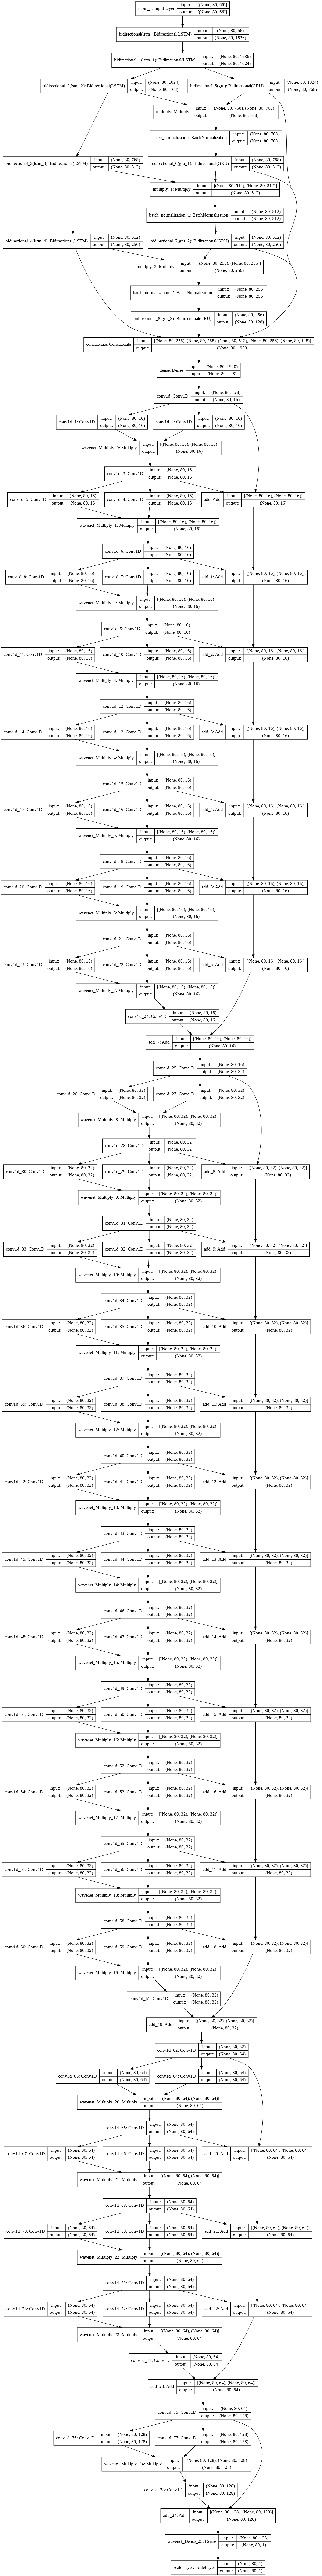

In [ ]:
plot_model(
    model, 
    to_file='Google_Brain_Keras_Model.png', 
    show_shapes=True,
    show_layer_names=True
)


In [ ]:
del model
gc.collect()

67816

In [44]:
#reset Keras Session
def reset_keras():
    sess = tf.compat.v1.keras.backend.get_session()
    tf.compat.v1.keras.backend.clear_session()
    sess.close()
    sess = tf.compat.v1.keras.backend.get_session()

    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
    gc.collect()

reset_keras()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

def press_diff(series: np.ndarray):
  return series.diff().abs()


def analy_predict(last_test_idx, train_pred):
  train_df = pd.read_csv('../input/ventilator-pressure-prediction/train.csv')
  last_test_breath_ids = train_df['breath_id'].values.reshape(-1, 80)
  last_test_breath_ids = last_test_breath_ids[:, 0]
  last_test_breath_ids = last_test_breath_ids.flatten()
  last_test_breath_ids = last_test_breath_ids[last_test_idx]

  train_pred = train_pred[last_test_idx]
  train_pred = train_pred.flatten()

  train_df = train_df[train_df['breath_id'].isin(last_test_breath_ids)]
  train_df['pred'] = train_pred
  train_df['abs_error'] = np.abs(train_pred-train_df['pressure'])
  train_df['RC'] = train_df["R"].astype(str) + '__' + train_df["C"].astype(str)
  train_df['press_diff'] = train_df.groupby('breath_id')['pressure'].apply(press_diff)

  df_feature = train_df[train_df['u_out']<1].groupby('breath_id').agg({'abs_error': ['mean' , 'max', 'min', 'sum', 'count'], 
                                                                      'RC': ['first'], 
                                                                      'press_diff':['mean', 'max'],
                                                                      'u_in':['first', 'last'],
                                                                      'pressure':['first', 'last', 'mean', 'std']
                                                                      })
  df_feature.columns = ['_'.join(col) for col in df_feature.columns]

  plt.figure(figsize=(16,16))

  plt.title("abs_error distribution by RC")

  for key, grp in df_feature.groupby(['RC_first']):
    print(f'{key} - MAE  {grp.abs_error_mean.mean()}, count: {grp.abs_error_count.sum()}')
    sns.kdeplot(grp['abs_error_mean'], clip=(0.0, 1), 
                label=key)

  plt.axvline(df_feature['abs_error_mean'].mean())
  plt.legend()
  plt.show()



with tpu_strategy.scope():
    skip_folds = np.arange(1)
    VERBOSE = 2
    EPOCHS = 200
    FOLDS = 7
    if DEBUG:
      EPOCHS = 100
    test_preds = []
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=2021)
    last_test_idx = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        last_test_idx = test_idx
        if len(test_preds) > fold:
          print(f'Ignore corrent fold {fold+1} as we already predicted test data')

        if DEBUG and fold > 0:
          continue
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        model = dnn_model_GaussianNoise()
        model.compile(optimizer="adam", loss="mae")

        lr = ReduceLROnPlateau(monitor="val_loss", factor=0.75, 
                               patience=10, verbose=VERBOSE)
        checkpoint_name = f'./model-gpu/Bidirect_LSTM_model_{fold+1}C.h5'
        chk_point = ModelCheckpoint(checkpoint_name,
                                    monitor='val_loss', verbose=VERBOSE, 
                                    save_best_only=True, mode='min')

        es = EarlyStopping(monitor="val_loss", patience=50,
                           verbose=VERBOSE, mode="min",
                           restore_best_weights=True)
        
        if fold not in skip_folds:
          model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    batch_size=BATCH_SIZE, 
                    callbacks=[lr, chk_point, es])
        else:
          print('Load pretrain weight from ', checkpoint_name)
          load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
          try:
            # At loading time, register the custom objects with a `custom_object_scope`:
            custom_objects = {"ScaleLayer": ScaleLayer}
            with tf.keras.utils.custom_object_scope(custom_objects):
                model = load_model(checkpoint_name, options=load_locally)
          except (OSError):
            print('Cannot load pretrain weight from ', checkpoint_name)
            break
                
        y_true = y_valid.squeeze().reshape(-1, 1)
        y_pred = model.predict(X_valid, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1)
        train_pred[test_idx] = y_pred.reshape(-1, 80)
        score = mean_absolute_error(y_true, y_pred)
        test_preds.append(model.predict(test, batch_size=BATCH_SIZE).squeeze().reshape(-1, 1).squeeze())

        print(f"Fold-{fold+1} | OOF Score: {score}")
        
        del X_train, X_valid, y_train, y_valid, model
        reset_keras()
        gc.collect()

        analy_predict(test_idx, train_pred)
        break

In [45]:
#skip_folds = np.arange(1)
skip_folds = []
train_pred = np.zeros(targets.shape)

with tpu_strategy.scope():
    
    VERBOSE = 2
    EPOCHS = 200
    FOLDS = 7
    if DEBUG:
      EPOCHS = 100
    test_preds = []
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=2021)
    last_test_idx = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        last_test_idx = test_idx
        if len(test_preds) > fold:
          print(f'Ignore corrent fold {fold+1} as we already predicted test data')

        if DEBUG and fold > 0:
          continue
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]
        
        model = dnn_model_aen()
        model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), 
              # loss="mae"
              loss = {
                  'decoder': tf.keras.losses.MeanSquaredError(), 
                  #'decoder': tf.keras.losses.MeanAbsoluteError(), 
                  'ae_action': tf.keras.losses.MeanAbsoluteError(),
                  'output': tf.keras.losses.MeanAbsoluteError(), 
                  },
              loss_weights = [1, 1, 1]
              )

        lr = ReduceLROnPlateau(monitor="val_output_loss", factor=0.75, 
                               patience=10, verbose=VERBOSE)
        checkpoint_name = f'./model-gpu/Bidirect_LSTM_model_{fold+1}C.h5'
        chk_point = ModelCheckpoint(checkpoint_name,
                                    monitor='val_output_loss', 
                                    verbose=VERBOSE, 
                                    save_best_only=True, mode='min')

        es = EarlyStopping(monitor="val_output_loss", patience=50,
                           verbose=VERBOSE, mode="min",
                           restore_best_weights=True)
        
        if fold not in skip_folds:
          model.fit(X_train, [X_train, y_train, y_train], 
                    validation_data=(X_valid, [X_valid, y_valid, y_valid]), 
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    batch_size=BATCH_SIZE, 
                    callbacks=[lr, chk_point, es])
        else:
          print('Load pretrain weight from ', checkpoint_name)
          load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
          try:
            # At loading time, register the custom objects with a `custom_object_scope`:
            custom_objects = {"ScaleLayer": ScaleLayer}
            with tf.keras.utils.custom_object_scope(custom_objects):
                model = load_model(checkpoint_name, options=load_locally)
          except (OSError):
            print('Cannot load pretrain weight from ', checkpoint_name)
            break
                
        y_true = y_valid.squeeze().reshape(-1, 1)
        y_pred = model.predict(X_valid, batch_size=BATCH_SIZE)[-1].squeeze().reshape(-1, 1)
        train_pred[test_idx] = y_pred.reshape(-1, 80)
        score = mean_absolute_error(y_true, y_pred)
        test_preds.append(model.predict(test, batch_size=BATCH_SIZE)[-1].squeeze().reshape(-1, 1).squeeze())

        print(f"Fold-{fold+1} | OOF Score: {score}")
        
        del X_train, X_valid, y_train, y_valid, model
        reset_keras()
        gc.collect()

        analy_predict(test_idx, train_pred)


In [ ]:
train.shape, targets.shape

((75450, 80, 66), (75450, 80))

In [ ]:
retrain_idx = np.logical_or((train[:, 0, -4] == 1), (train[:, 0, -5] == 1))
train = train[retrain_idx]
targets = targets[retrain_idx]
train.shape, targets.shape

((16449, 80, 66), (16449, 80))

In [ ]:
BATCH_SIZE=256
with tpu_strategy.scope():
    
    VERBOSE = 2
    EPOCHS = 200
    FOLDS = 7
    if DEBUG:
      EPOCHS = 100
    test_preds = []
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=2021)
    last_test_idx = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(train, targets)):
        last_test_idx = test_idx
        if len(test_preds) > fold:
          print(f'Ignore corrent fold {fold+1} as we already predicted test data')

        if DEBUG and fold > 0:
          continue

        #
        X_train, X_valid = train[train_idx], train[test_idx]
        y_train, y_valid = targets[train_idx], targets[test_idx]

        fit_batch_size = X_train.shape[0] - (X_train.shape[0]%BATCH_SIZE)
        print(X_train.shape[0], fit_batch_size)
        X_train, y_train = X_train[:fit_batch_size, :, :], y_train[:fit_batch_size, :]
        
        fit_batch_size = X_valid.shape[0] - (X_valid.shape[0]%BATCH_SIZE)
        print(X_valid.shape[0], fit_batch_size)
        X_valid, y_valid = X_valid[:fit_batch_size, :, :], y_valid[:fit_batch_size, :]
        
        
        # Sometime we cannot load model.
        model = load_dnn_model_v4_add_wavenet()
        model.compile(optimizer="adam", loss="mae")

        lr = ReduceLROnPlateau(monitor="val_loss", factor=0.75, 
                               patience=10, verbose=VERBOSE)
        checkpoint_name = f'./model-gpu/Bidirect_LSTM_model_{fold+1}C.h5'
        chk_point = ModelCheckpoint(checkpoint_name,
                                    monitor='val_loss', verbose=VERBOSE, 
                                    save_best_only=True, mode='min')

        es = EarlyStopping(monitor="val_loss", patience=50,
                           verbose=VERBOSE, mode="min",
                           restore_best_weights=True)
        
        if fold not in skip_folds:
          model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid), 
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    batch_size=BATCH_SIZE, 
                    callbacks=[lr, chk_point, es])
        else:
          print('Load pretrain weight from ', checkpoint_name)
          load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
          try:
            # At loading time, register the custom objects with a `custom_object_scope`:
            custom_objects = {"ScaleLayer": ScaleLayer}
            with tf.keras.utils.custom_object_scope(custom_objects):
                model = load_model(checkpoint_name, options=load_locally)
          except (OSError):
            print('Cannot load pretrain weight from ', checkpoint_name)
            break
                
        #y_true = targets[test_idx].squeeze().reshape(-1, 1)
        # y_pred = model.predict(X_valid, batch_size=1).squeeze().reshape(-1, 1)
        # score = mean_absolute_error(y_true, y_pred)
        # print(f"Fold-{fold+1} | OOF Score: {score}")

        #Save CV predict
        # train_pred[test_idx] = y_pred.reshape(-1, 80)
        # test_preds.append(model.predict(test, batch_size=1).squeeze().reshape(-1, 1).squeeze())

        
        del X_train, X_valid, y_train, y_valid, model
        reset_keras()
        gc.collect()

        # analy_predict(test_idx, train_pred)

14099 14080
2350 2304
Load pretrain weight from  /gdrive/MyDrive/ventilator-pressure-prediction/gb-rescaling-eda-v3/Bidirect_LSTM_model_1C.h5
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 66)]     0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 80, 1536)     5130240     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 80, 1024)     8392704     bidirectional[0][0]              
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 80, 768)    

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
55/55 - 4s - loss: 0.1795 - val_loss: 0.1537

Epoch 00002: val_loss improved from 0.21124 to 0.15374, saving model to ./model-gpu/Bidirect_LSTM_model_1C.h5
Epoch 3/200
55/55 - 4s - loss: 0.1627 - val_loss: 0.1932

Epoch 00003: val_loss did not improve from 0.15374
Epoch 4/200
55/55 - 4s - loss: 0.1653 - val_loss: 0.1359

Epoch 00004: val_loss improved from 0.15374 to 0.13594, saving model to ./model-gpu/Bidirect_LSTM_model_1C.h5
Epoch 5/200
55/55 - 4s - loss: 0.1694 - val_loss: 0.2892

Epoch 00005: val_loss did not improve from 0.13594
Epoch 6/200
55/55 - 4s - loss: 0.2160 - val_loss: 0.1199

Epoch 00006: val_loss improved from 0.13594 to 0.11992, saving model to ./model-gpu/Bidirect_LSTM_model_1C.h5
Epoch 7/200
55/55 - 4s - loss: 0.1897 - val_loss: 0.1372

Epoch 00007: val_loss did not improve from 0.11992
Epoch 8/200
55/55 - 4s - loss: 0.1384 - val_loss: 0.2407

Epoch 00008: val_loss did not improve from 0.11992
Epoch 9/200
55/55 - 4s - loss: 0.2238 - val_loss: 0.2919

Ep

In [ ]:
if not DEBUG:
  train_pred = train_pred.flatten()
  targets = targets.flatten()
  score = mean_absolute_error(targets, train_pred)
  print(f"Train Score: {score}")

## Create submission file

In [ ]:
if not DEBUG:
  submission = pd.read_csv('../input/ventilator-pressure-prediction/sample_submission.csv')
  submission["pressure"] = sum(test_preds)/5
  submission.to_csv('submission.csv', index=False)

  # ENSEMBLE FOLDS WITH MEDIAN
  #取中位数
  submission["pressure"] = np.median(np.vstack(test_preds),axis=0)
  submission.to_csv('submission_median.csv', index=False)


  # ENSEMBLE FOLDS WITH MEDIAN AND ROUND PREDICTIONS
  submission["pressure"] =\
      np.round( (submission.pressure - pressure_min)/pressure_step ) * pressure_step + pressure_min
  submission.pressure = np.clip(submission.pressure, pressure_min, pressure_max)
  submission.to_csv('submission_median_round.csv', index=False)

# Analyze predict data

In [ ]:
analy_predict(last_test_idx, train_pred)

In [ ]:
!ls